In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
x_train = np.load("minist/x_train.npy")
y_train = np.load("minist/y_train.npy")
x_test = np.load("minist/x_test.npy")
y_test = np.load("minist/y_test.npy")

x_train_fallten = x_train.reshape(x_train.shape[0],-1).T
x_test_fallten = x_test.reshape(x_test.shape[0],-1).T

train_x = x_train_fallten / 255 * 0.99 + 0.01
test_x = x_test_fallten / 255* 0.99 + 0.01
y_test = y_test
y_train= y_train
# 特殊处理输出集
p_train = np.zeros(shape=(10,y_train.shape[0]))
for i in range(y_train.shape[0]):
    p_train[y_train[i],i] = 0.99


# 特殊处理输出集
p_test = np.zeros(shape=(10,y_test.shape[0]))
for i in range(y_test.shape[0]):
    p_test[y_train[i],i] = 0.99


def sigmoid(z):
    return 1/(1+np.exp(-z))# 求e次方


def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.

    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)

    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    w = np.random.randn(dim,10)*0.01
    b = 0
    ### END CODE HERE ###

    assert (w.shape == (dim, 10))
    assert (isinstance(b, float) or isinstance(b, int))

    return w, b


def propagate(w, b, X, Y):
    # 正向计算cost
    m = X.shape[1]  # 获取数据集的大小
    A = sigmoid((np.dot(w.T, X) + b))
    # cost = -Y*np.log(A)-(1-Y)*np.log(1-A)   这是错误的计算方法，因为此时的A，X中都包含了数据集的所有结果，所以，这样运行得到的，是整个
    # cost的值，而不是单个的，所以，对于整合cost的计算，要按照下面的公式
    cost = -(1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

    # 反向计算梯度
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    # 整合梯度函数
    grads = {
        "dw": dw,
        "db": db
    }
    cost = np.squeeze(cost)

    return cost, grads


def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """
    This function optimizes w and b by running a gradient descent algorithm

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps

    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.

    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    costs = []
    for i in range(num_iterations):
        cost, grads = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]

        # 计算新的wb
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # print("w: {} ,b:{}".format(w,b))

        # 每一百次记录一下cost
        if i % 100 == 0:
            costs.append(cost)

        # 每一百输出一次
        if print_cost and i % 100 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
    params = {
        "w": w,
        "b": b
    }

    grads = {
        "dw": dw,
        "db": db
    }
    return params, grads, costs


def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)

    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    m = X.shape[1]  # 获取测试集维度
    Y_prediction = np.zeros((1, m))  # 格式化
    w = w.reshape(X.shape[0], 10)  # 格式化
    A = sigmoid((np.dot(w.T, X) + b))
    Y_prediction = A.argmax(axis=0)
    return Y_prediction


def model(X_train, Y_train, X_test, Y_test, num_iterations=10000, learning_rate=0.05, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously

    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations

    Returns:
    d -- dictionary containing information about the model.
    """
    """
    函数列表
    sigmoid(z)    # 预测函数
    initialize_with_zeros(dim) # 初始化wb,dim表示维度
    propagate(w,b,X,Y) # 计算梯度以及花费
    optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False) # 训练模型，计算新的w，新的b，以及cost，以及梯度
    predict(w,b,X)   # 对于给定的w,b，X预测结果
    """

    # 初始化w，b
    w, b = initialize_with_zeros(X_train.shape[0])
    params, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = params["w"]
    b = params["b"]
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # print(Y_prediction_train)
    # print("训练的准确度: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))  # mean函数求的是均值
    # print("测试集的准确度: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))  # abs函数求的是绝对值

    correct_rate_train =  (60000-np.count_nonzero(Y_prediction_train-y_train)) / 60000 * 100
    correct_rate_test =  (10000-np.count_nonzero(Y_prediction_test-y_test)) / 10000   * 100
    print("训练集的准确度为：{} %".format(correct_rate_train))
    print("测试集的准确度为：{} %".format(correct_rate_test))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train": Y_prediction_train,
         "w": w,
         "b": b,
         "learning_rate": learning_rate,
         "num_iterations": num_iterations}

    return d
d = model(train_x, p_train, test_x, p_test, num_iterations = 3000, learning_rate = 0.05, print_cost = True)

Cost after iteration 0: 7.012777
Cost after iteration 100: 1.601845
Cost after iteration 200: 1.301789
Cost after iteration 300: 1.168384
Cost after iteration 400: 1.089816
Cost after iteration 500: 1.037030
Cost after iteration 600: 0.998701
Cost after iteration 700: 0.969388
Cost after iteration 800: 0.946119
Cost after iteration 900: 0.927117
Cost after iteration 1000: 0.911252
Cost after iteration 1100: 0.897769
Cost after iteration 1200: 0.886138
Cost after iteration 1300: 0.875983
Cost after iteration 1400: 0.867022
Cost after iteration 1500: 0.859043
Cost after iteration 1600: 0.851884
Cost after iteration 1700: 0.845415
Cost after iteration 1800: 0.839535
Cost after iteration 1900: 0.834162
Cost after iteration 2000: 0.829228
Cost after iteration 2100: 0.824677
Cost after iteration 2200: 0.820463
Cost after iteration 2300: 0.816547
Cost after iteration 2400: 0.812896
Cost after iteration 2500: 0.809481
Cost after iteration 2600: 0.806280
Cost after iteration 2700: 0.803270
Cost

In [3]:
import scipy
import imageio
from PIL import Image
from scipy import ndimage
from matplotlib.pyplot import imread

你的预测结果为： [0]


C:\Users\ish\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


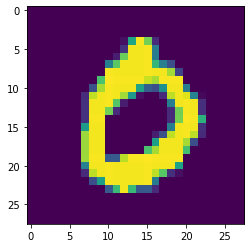

In [7]:
my_image = np.array(Image.fromarray(x_test[3]).resize(size=(28,28))).reshape((1, 28*28)).T
# print(image.shape)
# my_image = scipy.misc.imresize(image, size=(28,28)).reshape((1, 28*28)).T
my_predicted_image = predict(d["w"], d["b"], my_image)
print("你的预测结果为：",my_predicted_image)
plt.imshow(x_test[3])
